In [28]:
pip install fredapi

Note: you may need to restart the kernel to use updated packages.


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option("display.max_columns", 500)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

from fredapi import Fred

fred_key = 'b59397e1d6440fcd8740a0c2260de219'

1. Create The Fred Object

In [40]:
fred = Fred(api_key = fred_key)

2. Search for Economic Data!

In [47]:
sp_search = fred.search('S&P', order_by = 'popularity')

In [43]:
sp_search.shape

(1000, 15)

In [49]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-02-05,2023-02-05,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-02-02,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-02-03 08:49:08-06:00,94,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-02-05,2023-02-05,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-01-31 08:01:02-06:00,90,"For more information regarding the index, plea..."
SP500,SP500,2023-02-05,2023-02-05,S&P 500,2013-02-04,2023-02-03,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-02-03 19:11:01-06:00,84,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-02-05,2023-02-05,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-02-02,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-02-03 08:49:12-06:00,84,This data represents the effective yield of th...
CSUSHPISA,CSUSHPISA,2023-02-05,2023-02-05,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2023-01-31 08:01:04-06:00,83,"For more information regarding the index, plea..."


3. Pull Raw Data & Plot

In [52]:
sp500 = fred.get_series('SP500')

<AxesSubplot:title={'center':'S&P 500'}>

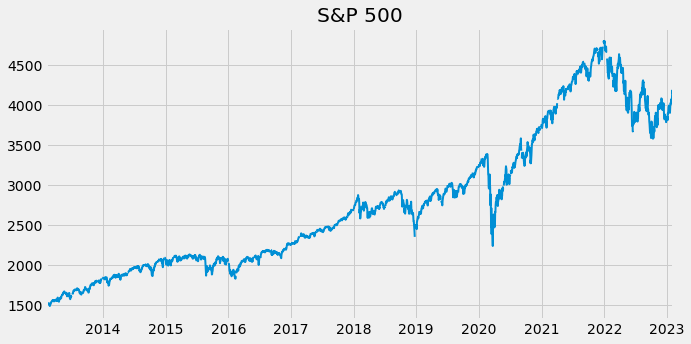

In [56]:
sp500.plot(figsize = (10, 5), 
           title = 'S&P 500', 
           lw = 2)

4. Pull and Join Multiple Data Series

In [256]:
unemp_df = fred.search('unemployment rate state', filter = ('frequency', 'Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [257]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name = myid)
    all_results.append(results)

In [ ]:
unemp_results = pd.concat(all_results, axis = 1)

In [264]:
names = []
for i in list(unemp_results.columns):
    if len(i) > 4:
        names.append(i)

In [267]:
unemp_results = pd.concat(all_results, axis = 1).drop(columns = names)
unemp_results

,CAUR,FLUR,TXUR,NYUR,OHUR,MIUR,PAUR,ALUR,NCUR,MOUR,GAUR,ILUR,KYUR,VAUR,COUR,WIUR,WAUR,MNUR,OKUR,AZUR,NJUR,WVUR,TNUR,INUR,SCUR,MAUR,NVUR,ORUR,IAUR,ARUR,UTUR,MDUR,NMUR,KSUR,LAUR,DCUR,AKUR,HIUR,PRUR,MTUR,NEUR,IDUR,NDUR,SDUR,MSUR,CTUR,NHUR,MEUR,WYUR,RIUR,DEUR,VTUR
1929-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-01,3.8,2.5,4.0,4.3,4.0,4.1,4.1,2.6,3.6,2.4,2.8,4.5,3.8,2.6,3.4,3.2,3.7,2.0,3.2,3.7,3.3,4.0,3.4,2.8,3.2,3.4,4.4,3.8,2.7,3.5,2.1,4.0,4.2,2.6,3.4,4.7,4.4,3.5,NaN,2.9,2.2,2.8,2.2,2.3,3.6,4.0,2.2,3.3,3.3,3.1,4.3,2.1
2022-10-01,4.0,2.7,4.0,4.3,4.2,4.2,4.0,2.7,3.8,2.6,2.9,4.6,3.9,2.7,3.6,3.3,3.8,2.1,3.4,3.9,3.4,4.0,3.5,3.0,3.3,3.5,4.6,4.1,2.9,3.6,2.1,4.5,4.3,2.8,3.3,4.8,4.5,3.3,NaN,3.0,2.4,2.9,2.3,2.4,3.8,4.3,2.4,3.6,3.5,3.4,4.3,2.3
2022-11-01,4.1,2.6,4.0,4.3,4.2,4.3,4.0,2.7,3.9,2.7,3.0,4.7,4.0,2.8,3.5,3.3,4.0,2.3,3.4,4.1,3.4,4.1,3.5,3.0,3.3,3.4,4.9,4.3,3.1,3.7,2.2,4.3,4.1,2.8,3.3,4.6,4.5,3.3,NaN,2.9,2.5,3.0,2.3,2.4,3.9,4.2,2.6,3.7,3.6,3.6,4.4,2.5
2022-12-01,4.1,2.5,3.9,4.3,4.2,4.3,3.9,2.8,3.9,2.8,3.0,4.7,4.0,3.0,3.3,3.2,4.2,2.5,3.4,4.0,3.4,4.1,3.5,3.1,3.3,3.3,5.2,4.5,3.1,3.6,2.2,4.0,3.9,2.9,3.5,4.7,4.3,3.2,NaN,2.8,2.6,2.9,2.3,2.3,4.0,4.2,2.7,3.8,3.7,3.5,4.4,2.6


In [269]:
unemp_states = unemp_results.dropna()

In [287]:
# Plot States Unemployment Rate
px.line(unemp_states)

Pull May 2020 Unemployment Rate Per State

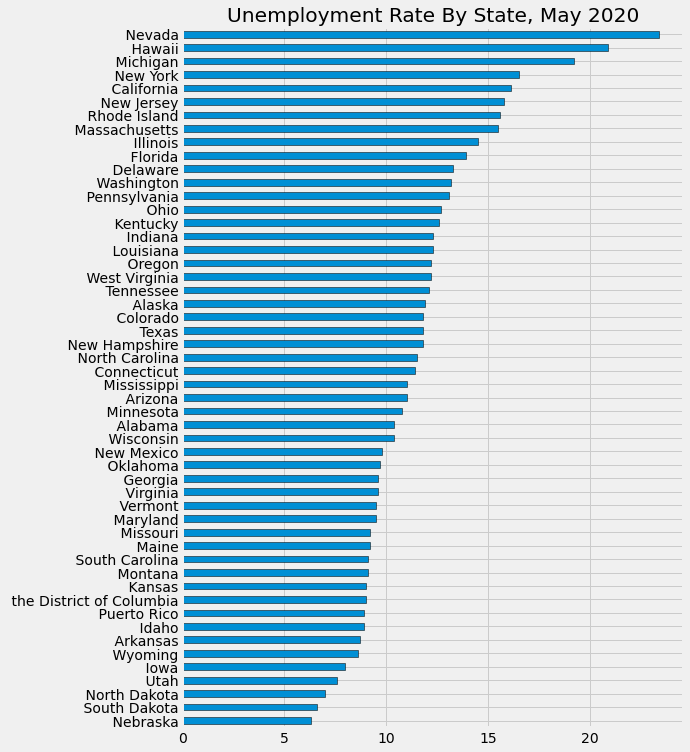

In [291]:
ax = unemp_states.loc[unemp_states.index =='2020-05-01'].T.sort_values('2020-05-01').plot(kind = 'barh', figsize = (8, 12), edgecolor = 'black', title = "Unemployment Rate By State, May 2020")
ax.legend().remove()
plt.show()

In [283]:
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in', '').to_dict()
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]